# QuTiP Example: Stinespring Dilation of Quantum Channels

[Christopher Granade](http://www.cgranade.com/) <br>
University of Sydney
$\newcommand{\ket}[1]{\left|#1\right\rangle}$
$\newcommand{\bra}[1]{\left\langle#1\right|}$
$\newcommand{\cnot}{{\scriptstyle \rm CNOT}}$
$\newcommand{\TT}{\operatorname{T}}$
$\newcommand{\Tr}{\operatorname{Tr}}$
$\newcommand{\Uni}{\operatorname{U}}$
$\newcommand{\Chan}{\operatorname{C}}$
$\newcommand{\Hil}{\mathcal{H}}$

## Introduction

In this notebook, we will demonstrate the ``to_stinespring`` function, which converts a ``Qobj`` representing the quantum channel $\Phi$ to a pair of partial isometries that describe the action of $\Phi$.

In introducing the Stinespring dilation, it is helpful to first adopt some notation. Let $\Hil_X$, $\Hil_Y$ and $\Hil_Z$ be finite-dimensional Hilbert spaces. Let $\Uni(\Hil_X, \Hil_Y)$ be the set of partial isometries from $\Hil_X$ to $\Hil_Y$, and $\TT(\Hil_X, \Hil_Y)$ be the set of maps (that is, superoperators) from operators on $\Hil_X$ to those acting on $\Hil_Y$. Finally, let $\Chan(\Hil_X, \Hil_Y) \subset \TT(\Hil_X, \Hil_Y)$ be the set of *channels*; that is, those maps which are completely positive and trace-preserving.

For a quantum map $\Phi \in \TT(\Hil_X, \Hil_Y)$, then, the Stinespring dilation of $\Phi$ is a pair of partial isometries $A, B \in \Uni(\Hil_X, \Hil_Y \otimes \Hil_Z)$ for some space $\Hil_Z$ such that
\begin{equation}
    \Phi(X) = \Tr_Z (A X B^\dagger).
    \label{eq:stinespring-action}
\end{equation}
If $\Phi$ is completely positive, then $A = B$. We do not insist on complete positivity, however, as it is common to consider the Stinespring dilation for the *difference* between two quantum channels, $\Phi - \Phi'$. By construction, such a map is not completely positive, nor is it trace-preserving.

Informally, the ancillary space $\Hil_Z$ serves the same role as the Kraus index. If $\Phi$ is a channel with Kraus operators $\{K_i : i \in \{0, \dots, k - 1\}\}$, then $A = B = \sum_i K_i \otimes \ket{i}$, such that summation over $i$ is performed by the partial trace in \eqref{eq:stinespring-action}.

The Stinespring representation is useful for [evaluating norms](http://theoryofcomputing.org/articles/v005a011/) and for building system/environment models of a quantum channel.

### Further Resources

- Watrous. [CS 766: Theory of Quantum Information (lecture notes)](https://cs.uwaterloo.ca/~watrous/CS766/) (2013).
-  Wood, Biamonte and Cory. *Tensor networks and graphical calculus for open quantum systems*. [arXiv:1111.6950](https://scirate.com/arxiv/1111.6950) (2011).
- Watrous. *Semidefinite Programs for Completely Bounded Norms*. [Theory of Computing **5** 217-238](http://theoryofcomputing.org/articles/v005a011/), [arXiv:0901.4709](https://scirate.com/arxiv/0901.4709) (2009).

## Preamble

### Features

We enable a few features such that this notebook runs in both Python 2 and 3.

In [1]:
from __future__ import division, print_function

### Imports

In [2]:
import numpy as np
import qutip as qt

from qutip.ipynbtools import version_table

### Plotting Support

In [3]:
%matplotlib inline

### Settings

In [4]:
qt.settings.colorblind_safe = True

##  Dilations of CPTP Maps

We'll start by considering the case in which $\Phi(X) = U X U^\dagger$ for a random unitary operator $U \in \Uni(\Hil_X, \Hil_X)$.

In [5]:
phi = qt.to_super(qt.rand_unitary_haar(4))

(<matplotlib.figure.Figure at 0x15196b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x151aa240>)

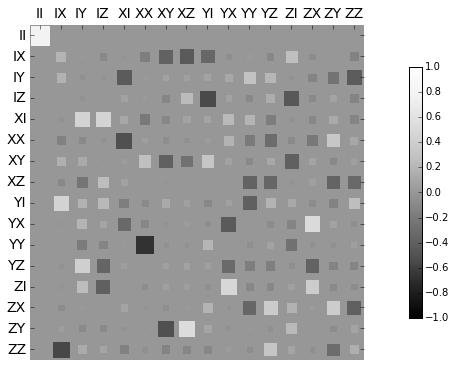

In [6]:
qt.visualization.hinton(phi)

By construction, $\Phi$ has one Kraus operator--- the random unitary itself. Because of numerical precision in finding eigenvalues of the Choi matrix, a decomposition will result in many operators with very small norms.

In [7]:
for K in qt.to_kraus(phi):
    print(K.norm())

2.70642265171e-09
4.0
1.88511414892e-08
1.8373251e-08
1.80758482677e-08
1.58961212907e-08
1.26188226114e-08
1.1992980316e-08
1.00658793755e-08
7.78750895932e-09
6.76433047695e-09
6.99714364395e-09
5.45340359053e-09
5.09955742198e-09
2.07306504802e-09
4.37841959814e-10


Because $\Phi$ only has one Kraus operator, the Stinespring dilation will use a 1-dimensional ancillary space.

In [8]:
A, B = qt.to_stinespring(phi)
print(A.dims)

[[4, 1], [4]]


If we ask for a random channel of Choi rank 2 (that is, with 2 Kraus operators), then the corresponding space will be two-dimensional instead.

In [9]:
A, B = qt.to_stinespring(qt.rand_super_bcsz(4, rank=2))
print(A.dims)

[[4, 2], [4]]


Moreover, since we have demanded that $A$ and $B$ are the Stinespring pair for a channel, we can easily verify that $A = B$.

In [10]:
A - B

Quantum object: dims = [[4, 2], [4]], shape = [8, 4], type = other
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

## Differences of Random Channels

Next, let's consider two random qubit channels from the [BCSZ distribution]([``qutip.visualization.hinton``](http://qutip.org/docs/3.0.1/apidoc/functions.html#qutip.random_objects.rand_super_bcsz).

In [11]:
phi1 = qt.rand_super_bcsz(2)
phi2 = qt.rand_super_bcsz(2)

Looking at the Pauli-basis Hinton diagram for the difference between these channels gives some insight into how this map behaves.

(<matplotlib.figure.Figure at 0x15b0cda0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15afb9e8>)

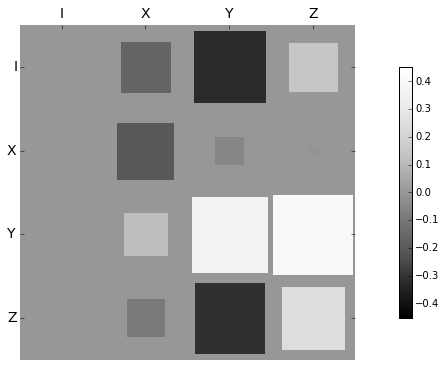

In [12]:
qt.visualization.hinton(phi1 - phi2)

In particular, note that $\Delta\Phi := \Phi_1 - \Phi_2$ annilates the traceful parts of its input, leaving an operator with negative eigenvalues. 

In [13]:
d_phi = qt.to_super(phi1 - phi2)
rho_in = qt.rand_dm(2)
rho = qt.vector_to_operator(d_phi * qt.operator_to_vector(rho_in))
print("Trace: {}\nEigenvalues:{}".format(rho.tr(), rho.eigenenergies()))
rho

Trace: 4.99600361081e-16
Eigenvalues:[-0.22021386  0.22021386]


Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.08452680+0.j         -0.08967972-0.18250181j]
 [-0.08967972+0.18250181j -0.08452680+0.j        ]]

Because $\Delta \Phi$ is not completely positive, we cannot obtain a Kraus decomposition where the left and right operators are the same:

In [14]:
Ks = qt.to_kraus(d_phi)

In [15]:
rho - sum(K * rho_in * K.dag() for K in Ks)

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[-0.31445118+0.j         -0.07839018-0.16271572j]
 [-0.07839018+0.16271572j -0.44970363+0.j        ]]

On the other hand, if we allow the left and right Kraus operators to be different, or consider a Stinespring dilation, we get the right answer:

In [16]:
A, B = qt.to_stinespring(d_phi)
rho - (A * rho_in * B.dag()).ptrace((0,))

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  0.]]

## Constructing System-Environment Models

For a channel $\Phi \in \Chan(\Hil_X, \Hil_X)$, once we have found the Stinespring dilation $A$, we then represent $\Phi$ as a *unitary* on the full space, $U \in \Uni(\Hil_X \otimes \Hil_Z)$, interpreting $\Hil_Z$ as a preparation of an environment. Concretely, we want to find $U$ such that for a preparation $\ket{\psi}$ of the environment,
\begin{equation}
    \Phi(X) = \Tr_Z(U \rho \otimes \ket{\psi}\bra{\psi} U^\dagger).
\end{equation}
By convention, we'll choose a basis for $\Hil_Z$ such that $\ket{\psi} = \ket{0}$. Then, if we let $V = A \otimes \bra{0}$,
\begin{equation}
    \Tr_Z(V \rho \otimes \ket{0}\bra{0} V^\dagger) =
    \Tr_Z(A \rho \otimes \bra{0}\ket{0}\bra{0}\ket{0} A) =
    \Tr_Z(A \rho A^\dagger)
\end{equation}
as desired.

In [17]:
A, B = qt.to_stinespring(qt.rand_super_bcsz(3))
V = qt.tensor(A, qt.basis(A.dims[0][-1], 0).dag())
# This adds an annoying left index, so let's drop it now.
del V.dims[0][-1]
V

Quantum object: dims = [[3, 9], [3, 9]], shape = [27, 27], type = oper, isherm = False
Qobj data =
[[ -2.35950366e-02+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    1.19397350e-01+0.35648863j   0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    1.91014827e-01-0.12032027j   0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j        ]
 [  1.48716872e-01+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
 

In [18]:
rho = qt.rand_dm_ginibre(3)
(A * rho * A.dag()).ptrace((0,)) - (V * qt.tensor(rho, qt.ket2dm(qt.basis(A.dims[0][-1], 0))) * V.dag()).ptrace((0,))

Quantum object: dims = [[3], [3]], shape = [3, 3], type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

It thus remains to extend $V$ to act non-trivially on the full space. This is done by noting that the singular values of $V$ are each one or zero, convienently partitioning $\Hil_X \otimes \Hil_Z$ into the null space of $V$ and its complement.

In [19]:
Vu, Vs, Vv = np.linalg.svd(V.data.todense())
U = qt.Qobj(Vu, dims=V.dims) * qt.Qobj(Vv, dims=V.dims)
U * U.dag()

Quantum object: dims = [[3, 9], [3, 9]], shape = [27, 27], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.

We finish by verifying that preparing an environment state, evolving under the system/environment unitary $U$, then partial tracing over the environment produces the same map as the original channel.

In [20]:
(A * rho * A.dag()).ptrace((0,)) - (U * qt.tensor(rho, qt.ket2dm(qt.basis(A.dims[0][-1], 0))) * U.dag()).ptrace((0,))

Quantum object: dims = [[3], [3]], shape = [3, 3], type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

## Epilouge

In [21]:
version_table()